In [58]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

df = pd.read_csv("clean_dataset.csv")

In [43]:
df.head()

,submission_date,industry,job_function,job_title,annual_salary_gross,additional_compensation,currency,country,city,remote_or_onsite,experience_field,education_level,gender,race
0,2023-04-11,Education (Higher Education),Education (Higher Education),Director of Financial Aid,48262.080,0.0,GBP,USA,Anadarko,On-site,11-20 years,College degree,Woman,White
1,2023-04-11,Education (Higher Education),Government & Public Administration,Administrative Assistant,33783.456,0.0,GBP,USA,Richmond,On-site,2-4 years,College degree,Man,White
2,2023-04-11,"Accounting, Banking & Finance",Administration,Executive Assistant,52283.920,0.0,GBP,USA,Orem,On-site,2-4 years,Some college,Woman,White
3,2023-04-11,Computing or Tech,Computing or Tech,Devops Automation Manager,64349.440,0.0,GBP,USA,Wellesley,Fully remote,5-7 years,College degree,Non-binary,White
4,2023-04-11,Hospitality & Events,Hospitality & Events,Assistant Manager,40218.400,0.0,GBP,USA,Columbus,On-site,5-7 years,College degree,Woman,White


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12782 entries, 0 to 12781
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   submission_date          12782 non-null  object 
 1   industry                 12782 non-null  object 
 2   job_function             12715 non-null  object 
 3   job_title                12782 non-null  object 
 4   annual_salary_gross      12782 non-null  float64
 5   additional_compensation  12782 non-null  float64
 6   currency                 12782 non-null  object 
 7   country                  12782 non-null  object 
 8   city                     12730 non-null  object 
 9   remote_or_onsite         12742 non-null  object 
 10  experience_field         12782 non-null  object 
 11  education_level          12782 non-null  object 
 12  gender                   12782 non-null  object 
 13  race                     12782 non-null  object 
dtypes: float64(2), object(

In [45]:
# Convert submission_date to datetime format
df['submission_date'] = pd.to_datetime(df['submission_date'], errors='coerce')

# Annual Gross Salary Distribution Across Industries in 2023

In [46]:
# Calculate summary statistics for salaries within each industry
salary_summary = df_2023.groupby('industry')['annual_salary_gross'].describe()
# Sort salary_summary by count
salary_summary = salary_summary.sort_values(by='count', ascending=False)

salary_summary

,count,mean,std,min,25%,50%,75%,max
industry,,,,,,,,
Education (Higher Education),1790.0,59666.727808,33399.338716,0.000000,42299.315000,53892.656000,68371.280000,5.972432e+05
Computing or Tech,1731.0,106659.524425,63215.441372,0.000000,68371.280000,98937.264000,134329.456000,1.206552e+06
Nonprofits,1463.0,64472.458473,28949.744367,28.152880,44240.240000,57914.496000,77219.328000,2.372886e+05
Health care,1268.0,81054.604402,83005.209911,33.783456,49441.463730,68371.280000,96524.160000,2.413104e+06
Engineering or Manufacturing,977.0,82482.026164,36867.848114,32.174720,57914.496000,77219.328000,100546.000000,4.885273e+05
"Accounting, Banking & Finance",863.0,86089.231853,65558.751765,3752.352000,53369.816800,74806.224000,104567.840000,1.351338e+06
Education (Primary/Secondary),580.0,57378.085115,35793.585595,67.566912,41827.136000,51630.773184,67502.964744,5.630576e+05
Law,468.0,101053.092193,128025.671145,8043.680000,49870.816000,74437.332500,110198.416000,1.769610e+06
Business or Consulting,457.0,98635.219112,79087.409444,60.327600,64349.440000,85263.008000,118242.096000,1.347316e+06


Based on the summary statistics for salaries within each industry in 2023, we can observe the following key points -

1. **Industries with Highest Number of Respondents:**
    * Education (Higher Education): This industry has the highest number of respondents (1789), with a mean salary of approximately 59,700 and a standard deviation of around 33,379. The median salary is about 49,975, with a range extending from a minimum of 13,938 to a maximum of 597,243.
    * Computing or Tech: This industry has the second-highest number of respondents (1730), with a significantly higher mean salary of around 106,721 and a standard deviation of 63,182. The median salary is about 99,228, with salaries ranging from 14,200 to 1,206,552.<br><br>
      
2. **High Mean Salaries:**
    * Computing or Tech and Law have high mean salaries, indicating that these industries tend to offer higher compensation. For example, the mean salary in Computing or Tech is around 106,721, and in Law, it is approximately 101,053.
    * Business or Consulting and Entertainment also show relatively high mean salaries, with means around 98,635 and 95,294, respectively.<br><br>

3. **High Variability in Salaries:**
    * Law and Health care exhibit high standard deviations (128,026 and 83,005, respectively), indicating a wide variability in salaries. This suggests significant differences in compensation within these industries.
    * Entertainment also shows a high standard deviation of around 141,353, reflecting diverse salary levels in this field.<br><br>

4. **Industries with Lower Mean Salaries:**
    * Social Work and Education (Primary/Secondary) have lower mean salaries, around 54,361 and 57,378, respectively. These industries also have relatively lower variability in salaries.<br><br>

5. **Median Salaries:**
    * The median salary provides a better sense of the central tendency in each industry. For instance, the median salary in Computing or Tech is around 99,228, while in Education (Higher Education), it is about 49,975.<br><br>

6. **Interquartile Range (IQR):**
    * The IQR (the range between the 25th and 75th percentiles) shows the spread of the middle 50% of salaries. Industries like Computing or Tech and Law have higher IQRs, indicating more significant differences in salary levels within these ranges compared to industries like Education (Higher Education) and Social Work, which have smaller IQRs.

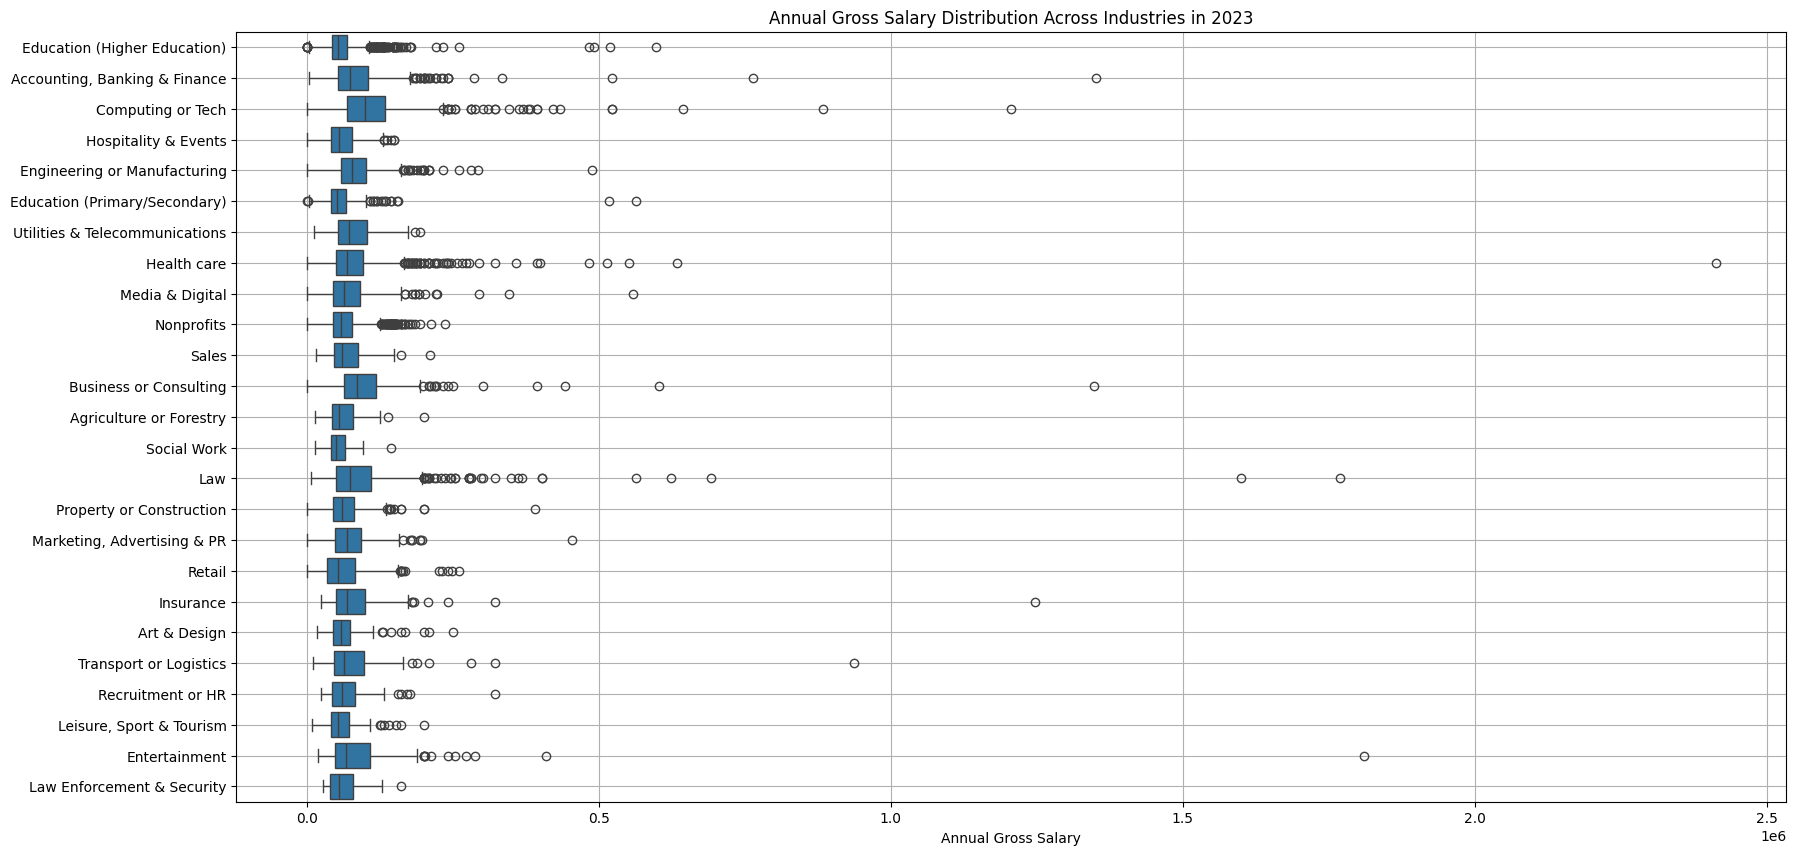

In [47]:
# Filter for the year 2023
df_2023 = df[df['submission_date'].dt.year == 2023]

# Plot the salary distribution across industries with adjusted figure size
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_2023, x='annual_salary_gross', y='industry')
plt.title('Annual Gross Salary Distribution Across Industries in 2023')
plt.xlabel('Annual Gross Salary')
plt.ylabel('')
plt.grid(True)
plt.show()

From the box plot showing the salary distribution across various industries in 2023, we can make several observations:

1. Median Salaries:
    * Industries like Computing or Tech, and Accounting, Banking & Finance appear to have higher median salaries compared to other industries.
    * Industries such as Education (Higher Education) and Hospitality & Events show lower median salaries.

2. Salary Ranges:
    * The range of salaries (represented by the length of the whiskers) varies significantly across industries.
    * Industries like Computing or Tech have a wider range of salaries, indicating greater variability in compensation within this industry.
    * Conversely, industries like Education (Higher Education) and Hospitality & Events have narrower salary ranges, suggesting more uniformity in salaries.

3. Outliers:
    * Some industries, particularly Computing or Tech, show several outliers, indicating that there are individuals in these industries earning significantly more or less than the majority.
    * Industries like Hospitality & Events and Education (Higher Education) have fewer outliers, suggesting that salaries in these fields are more consistent.

4. Overall Distribution:
    * The interquartile ranges (the boxes) show the spread of the middle 50% of salaries in each industry. Industries such as Computing or Tech and Accounting, Banking & Finance have wider interquartile ranges, indicating more diversity in salary levels within the middle 50%.

# Impact of Remote Work on Salaries

In [53]:
df.remote_or_onsite.unique()

array(['On-site', 'Fully remote', 'Hybrid', "Other/it's complicated", nan],
      dtype=object)

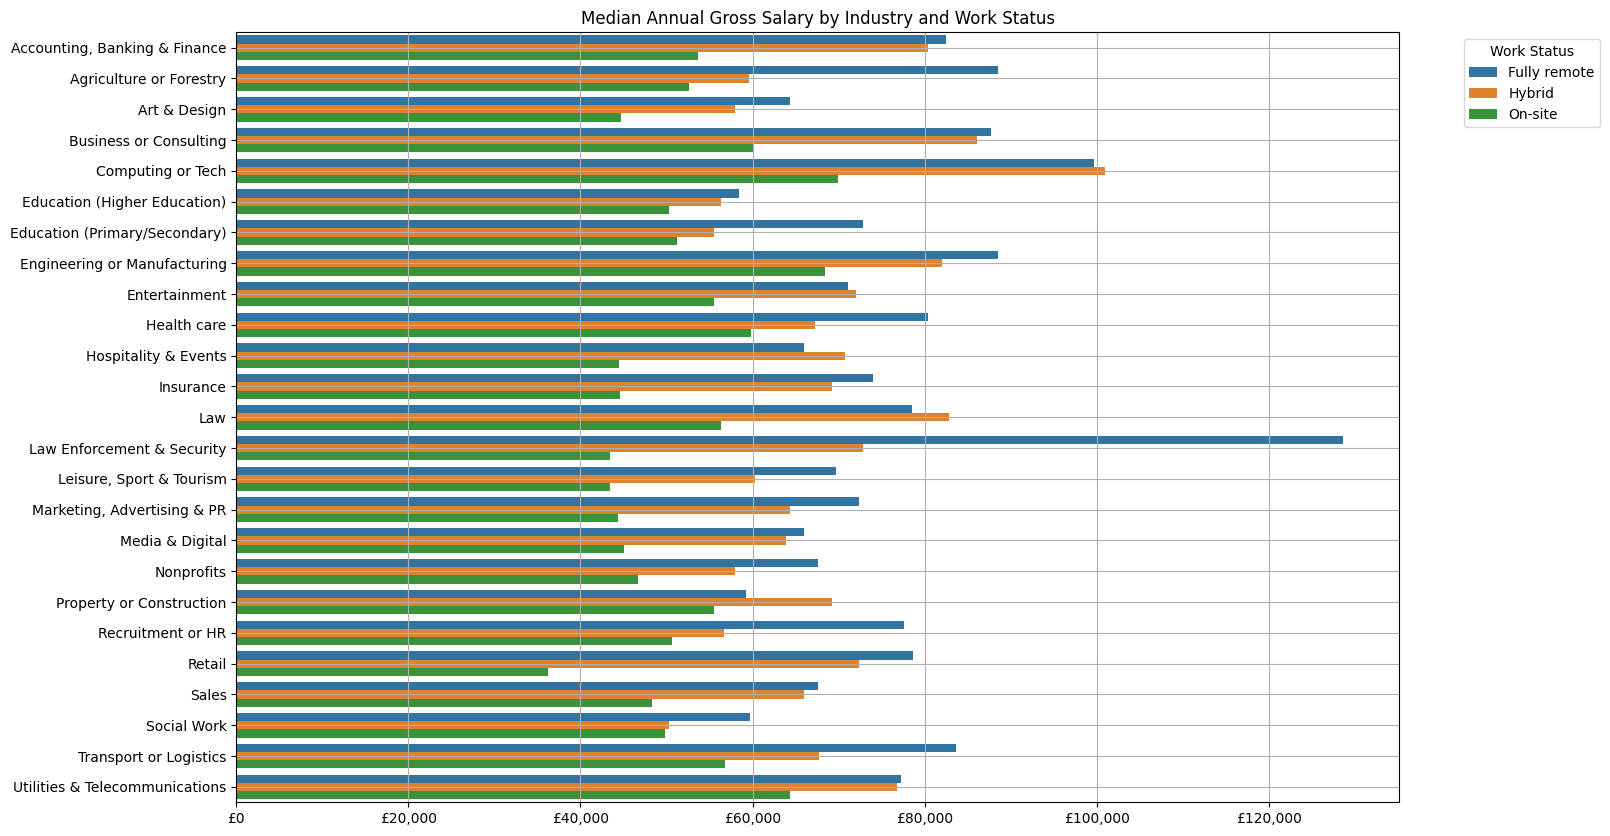

In [59]:
# Filter for the relevant remote work statuses
work_statuses = ['On-site', 'Fully remote', 'Hybrid']
df_filtered = df[df['remote_or_onsite'].isin(work_statuses)]

# Calculate the median salaries for each industry and remote work status
median_salaries = df_filtered.groupby(['industry', 'remote_or_onsite'])['annual_salary_gross'].agg(['median']).reset_index()

# Function to format the x-axis ticks with a GBP sign
def gbp(x, pos):
    return f'£{x:,.0f}'
    
# Plot the median salaries for remote vs onsite work by industry
plt.figure(figsize=(15, 10))
sns.barplot(data=median_salaries, x='median', y='industry', hue='remote_or_onsite')
plt.title('Median Annual Gross Salary by Industry and Work Status')
plt.xlabel('')
plt.ylabel('')
plt.legend(title='Work Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
# Apply the GBP formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(gbp))

plt.show()

Observations -

1. **Salary Comparison by Work Status:**
    * In many industries, the median salary for fully remote workers is comparable to or higher than those for on-site or hybrid workers. This trend is noticeable in industries like Computing or Tech, Business or Consulting, and Media & Digital.
    * Some industries, such as Education (Higher Education), show little variation in median salaries across different work statuses, indicating uniform compensation regardless of work arrangement.<br><br>

2. **Industry-Specific Insights:**
    * Computing or Tech and Law have higher median salaries across all work statuses compared to other industries.
    * Nonprofits, Education (Primary/Secondary), and Social Work have lower median salaries overall, irrespective of work status.<br><br>

3. **Work Status Impact:**
    * Hybrid work status tends to have varying impacts across industries. In some industries, hybrid work has higher median salaries (e.g., Engineering or Manufacturing), while in others, it has lower median salaries compared to fully remote or on-site work.<br><br>

4. **Salary Distribution:**
    * The bar plot provides a clear visual comparison, making it easier to identify which industries offer better compensation for remote work and which ones are more inclined towards on-site work.